V tomto notebooku se pokusím vyhodnotit naimplementované agenty

In [51]:
from src.game.Game import Game
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from conf.config import HEIGHT, WIDTH
print(f"Game size: {WIDTH}x{HEIGHT} -> max score: {WIDTH*HEIGHT}")

Game size: 30x20 -> max score: 600


In [52]:
N_TESTS = 10
astar_heuristics = ["Manhattan", "Euclidean", "Manhattan++"]
df = pd.DataFrame(columns=["solver", "score", "moves", "time"])

In [53]:
for heuristic in astar_heuristics:
    for i in range(N_TESTS):
        start = datetime.now()
        game = Game(solver="Astar", heuristic=heuristic)
        game.play()
        df = pd.concat([df, pd.DataFrame([[f"Astar-{heuristic}", game.score, game.moves, (datetime.now() - start).seconds]], columns=df.columns)], ignore_index=True)

In [54]:
for i in range(N_TESTS):
    start = datetime.now()
    game = Game(solver="Genetic")
    game.play()
    df = pd.concat([df, pd.DataFrame([[f"Genetic", game.score, game.moves, (datetime.now() - start).seconds]], columns=df.columns)], ignore_index=True)

In [55]:
df.groupby("solver").mean()

,score,moves,time
solver,,,
Astar-Euclidean,86.9,1215.2,0.1
Astar-Manhattan,97.2,1519.9,0.2
Astar-Manhattan++,117.3,1588.6,0.2
Genetic,50.7,936.1,44.8


In [56]:
df[df['solver'] == 'Astar-Euclidean']

,solver,score,moves,time
10,Astar-Euclidean,85,1185,0
11,Astar-Euclidean,85,1181,0
12,Astar-Euclidean,75,1080,0
13,Astar-Euclidean,58,807,0
14,Astar-Euclidean,107,1575,0
15,Astar-Euclidean,72,952,0
16,Astar-Euclidean,139,2084,1
17,Astar-Euclidean,109,1407,0
18,Astar-Euclidean,93,1175,0
19,Astar-Euclidean,46,706,0


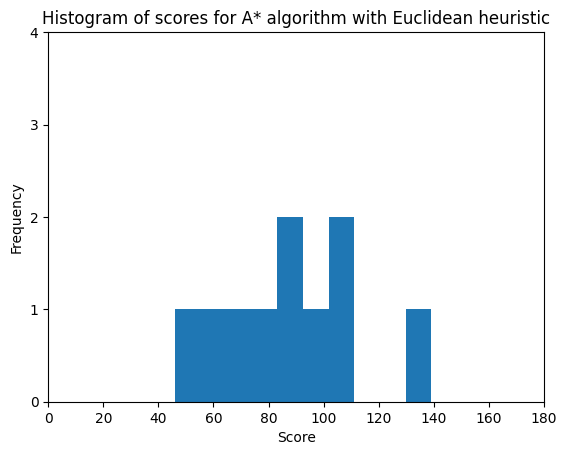

In [57]:
plt.hist(df[df['solver'] == 'Astar-Euclidean']['score'], bins=N_TESTS)
plt.title("Histogram of scores for A* algorithm with Euclidean heuristic")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yticks(range(0, 5))
_ = plt.xticks(range(0, 200, 20))

In [58]:
df[df['solver'] == 'Astar-Manhattan']

,solver,score,moves,time
0,Astar-Manhattan,119,1766,1
1,Astar-Manhattan,85,1192,0
2,Astar-Manhattan,84,1345,0
3,Astar-Manhattan,126,2071,0
4,Astar-Manhattan,109,1732,1
5,Astar-Manhattan,80,1252,0
6,Astar-Manhattan,103,1512,0
7,Astar-Manhattan,76,1207,0
8,Astar-Manhattan,79,1302,0
9,Astar-Manhattan,111,1820,0


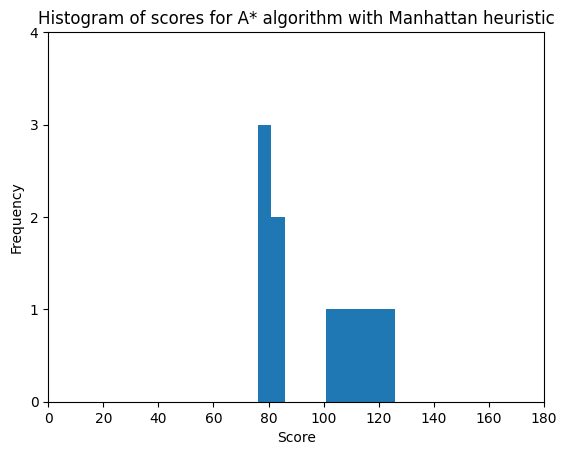

In [59]:
plt.hist(df[df['solver'] == 'Astar-Manhattan']['score'], bins=10)
plt.title("Histogram of scores for A* algorithm with Manhattan heuristic")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yticks(range(0, 5))
_ = plt.xticks(range(0, 200, 20))

In [60]:
df[df['solver'] == 'Astar-Manhattan++']

,solver,score,moves,time
20,Astar-Manhattan++,64,707,0
21,Astar-Manhattan++,88,1239,0
22,Astar-Manhattan++,148,2205,1
23,Astar-Manhattan++,118,1446,0
24,Astar-Manhattan++,129,1692,0
25,Astar-Manhattan++,116,1805,0
26,Astar-Manhattan++,153,2163,1
27,Astar-Manhattan++,91,1104,0
28,Astar-Manhattan++,133,1661,0
29,Astar-Manhattan++,133,1864,0


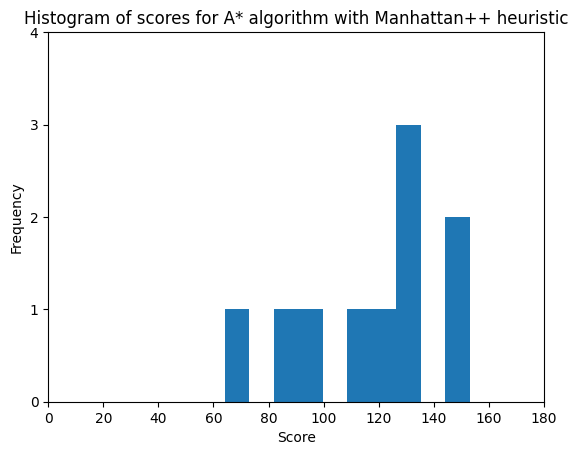

In [61]:
plt.hist(df[df['solver'] == 'Astar-Manhattan++']['score'], bins=10)
plt.title("Histogram of scores for A* algorithm with Manhattan++ heuristic")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yticks(range(0, 5))
_ = plt.xticks(range(0, 200, 20))

In [62]:
df[df['solver'] == 'Genetic']

,solver,score,moves,time
30,Genetic,53,1115,55
31,Genetic,72,1420,77
32,Genetic,53,912,42
33,Genetic,48,922,42
34,Genetic,30,474,19
35,Genetic,60,938,44
36,Genetic,56,1098,52
37,Genetic,67,1268,66
38,Genetic,36,664,29
39,Genetic,32,550,22


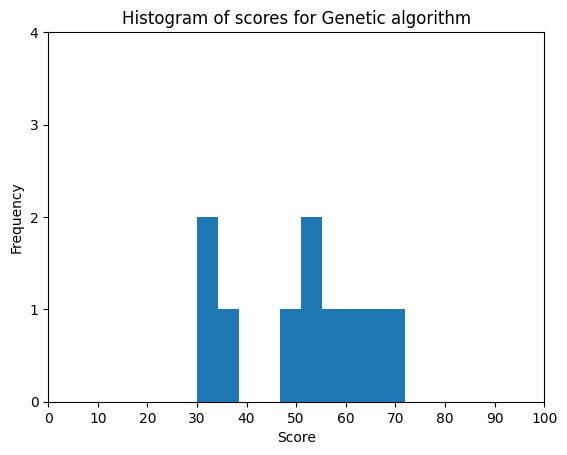

In [63]:
plt.hist(df[df['solver'] == 'Genetic']['score'], bins=10)
plt.title("Histogram of scores for Genetic algorithm")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yticks(range(0, 5))
_ = plt.xticks(range(0, 110, 10))